In [25]:
%pip install seaborn --user

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [27]:
# Import data
df = pd.read_csv('beach_vb.csv')
# Remove timestamp column
df = df.drop(columns=['Timestamp'])
# Drop empty first row
df = df.drop([0])

# Convert all team names to lowercase
df['Team Name/Number'] = df['Team Name/Number'].str.lower()

df.shape
# (Observations, Columns)

(21, 20)

In [28]:
df.nunique()

Team Name/Number                                                                            4
Pre-condition                                                                               2
Score after point                                                                          20
How was the point determined (responsibility)?                                              2
Which player(s) on team being observed was responsible for winning or losing the point?     5
How was the point won/lost?                                                                 4
Quality of Point                                                                            5
Type of Interaction                                                                        11
Quality of High-Fives / Physical Interaction                                                5
Quality of Verbal Interaction                                                               4
Who high-fived who? [Setter]                                

In [29]:
# Rename columns for consistency
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['team_name/number', 'pre-condition_', 'score_after_point',
       'how_was_the_point_determined_(responsibility)?',
       'which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?',
       'how_was_the_point_won/lost?', 'quality_of_point',
       'type_of_interaction', 'quality_of_high-fives_/_physical_interaction',
       'quality_of_verbal_interaction', 'who_high-fived_who?_[setter]',
       'who_high-fived_who?_[outside_hitter]',
       'who_high-fived_who?_[rightside_hitter]',
       'who_high-fived_who?_[middle]', 'who_talked_to_who?_[setter]',
       'who_talked_to_who?_[outside_hitter]',
       'who_talked_to_who?_[rightside_hitter]', 'who_talked_to_who?_[middle]',
       'length_of_play', 'team_sex'],
      dtype='object')

In [30]:
# Find NaN values
df.isna().sum()

team_name/number                                                                            0
pre-condition_                                                                              0
score_after_point                                                                           0
how_was_the_point_determined_(responsibility)?                                              0
which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?     0
how_was_the_point_won/lost?                                                                 0
quality_of_point                                                                            0
type_of_interaction                                                                         0
quality_of_high-fives_/_physical_interaction                                                0
quality_of_verbal_interaction                                                               1
who_high-fived_who?_[setter]                                

In [31]:
df.head()

,team_name/number,pre-condition_,score_after_point,how_was_the_point_determined_(responsibility)?,which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?,how_was_the_point_won/lost?,quality_of_point,type_of_interaction,quality_of_high-fives_/_physical_interaction,quality_of_verbal_interaction,who_high-fived_who?_[setter],who_high-fived_who?_[outside_hitter],who_high-fived_who?_[rightside_hitter],who_high-fived_who?_[middle],who_talked_to_who?_[setter],who_talked_to_who?_[outside_hitter],who_talked_to_who?_[rightside_hitter],who_talked_to_who?_[middle],length_of_play,team_sex
1,yellow,Point Won,1-0,Successful Offense,Right Side Hitter,Hit,4.0,"HF (High-Five), PS (Physical Support), VS (Ver...",4.0,3.0,"Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Rightside Hitter, Back row","Setter, Outside Hitter, Back row","Setter, Outside Hitter, Rightside Hitter",Rightside Hitter,NaN,Setter,NaN,2.0,Female
2,yellow,Point Won,3-1,Mistake,Right Side Hitter,Hit,1.0,"HF (High-Five), PS (Physical Support), VS (Ver...",2.0,2.0,"Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Outside Hitter, Rightside Hitter, Back...",NaN,NaN,NaN,"Setter, Outside Hitter, Rightside Hitter, Back...",3.0,Female
3,yellow,Point Lost,4-3,Successful Offense,Outside Hitter,Hit,4.0,"HF (High-Five), VS (Verbal Support)",1.0,1.0,Back row,Back row,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Female
4,yellow,Point Won,7-4,Successful Offense,Back-row,Hit,3.0,"HF (High-Five), PS (Physical Support), VC (Ver...",2.0,2.0,Back row,Back row,Back row,Setter,Back row,NaN,NaN,Setter,1.0,Female
5,yellow,Point Won,9-4,Successful Offense,Setter,Block,4.0,"HF (High-Five), PS (Physical Support), VS (Ver...",4.0,4.0,"Setter, Outside Hitter, Rightside Hitter, Back...",Setter,"Setter, Rightside Hitter",Setter,Setter,NaN,Setter,Setter,3.0,Female


C:\Users\trist\AppData\Local\Temp\ipykernel_30608\395602644.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['high_five_count'] = df[high_five_columns].applymap(count_high_fives).sum(axis=1)
C:\Users\trist\AppData\Local\Temp\ipykernel_30608\395602644.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_high_fives_per_point_per_gender.index, y=average_high_fives_per_point_per_gender.values, palette='viridis')


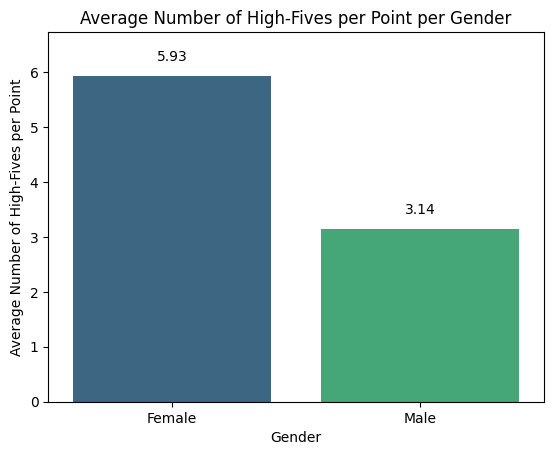

In [32]:
high_five_columns = [col for col in df.columns if 'who_high-fived_who?' in col]
def count_high_fives(cell):
    if pd.isna(cell) or cell == '':
        return 0
    return len(cell.split(','))
high_five_columns = [col for col in df.columns if 'who_high-fived_who?' in col]
df['high_five_count'] = df[high_five_columns].applymap(count_high_fives).sum(axis=1)
total_high_fives_by_gender = df.groupby('team_sex')['high_five_count'].sum()
total_rows = df.groupby('team_sex')['high_five_count'].count()
average_high_fives_per_point_per_gender = total_high_fives_by_gender / total_rows
ax = sns.barplot(x=average_high_fives_per_point_per_gender.index, y=average_high_fives_per_point_per_gender.values, palette='viridis')
plt.title('Average Number of High-Fives per Point per Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of High-Fives per Point')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

ymax = ax.get_ylim()[1] 
ax.set_ylim(top=ymax + 0.5) 
plt.show()

C:\Users\trist\AppData\Local\Temp\ipykernel_30608\2785234113.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['verbal_encouragement_count'] = df[verbal_encouragement_columns].applymap(count_verbal_interactions).sum(axis=1)
C:\Users\trist\AppData\Local\Temp\ipykernel_30608\2785234113.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_verbal_interactions_per_point_per_gender.index, y=average_verbal_interactions_per_point_per_gender.values, palette='rocket')


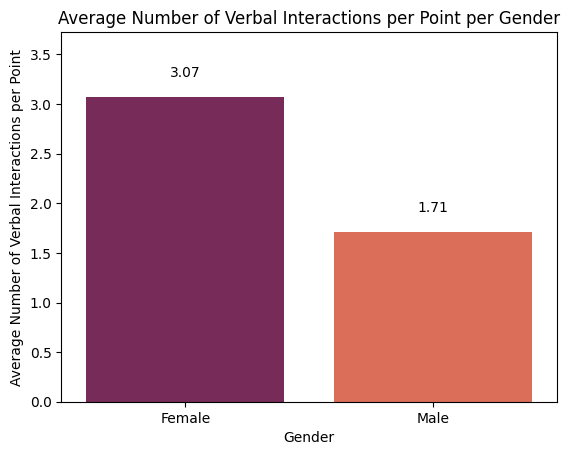

In [33]:
def count_verbal_interactions(cell):
    if pd.isna(cell) or cell == '':
        return 0
    return len(cell.split(','))
verbal_encouragement_columns = [col for col in df.columns if 'who_talked_to_who?' in col]
df['verbal_encouragement_count'] = df[verbal_encouragement_columns].applymap(count_verbal_interactions).sum(axis=1)
total_verbal_interactions_by_gender = df.groupby('team_sex')['verbal_encouragement_count'].sum()
total_points_by_gender = df.groupby('team_sex').size()
average_verbal_interactions_per_point_per_gender = total_verbal_interactions_by_gender / total_points_by_gender

ax = sns.barplot(x=average_verbal_interactions_per_point_per_gender.index, y=average_verbal_interactions_per_point_per_gender.values, palette='rocket')
plt.title('Average Number of Verbal Interactions per Point per Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Verbal Interactions per Point')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

ymax = ax.get_ylim()[1] 
ax.set_ylim(top=ymax + 0.5)
plt.show()

C:\Users\trist\AppData\Local\Temp\ipykernel_30608\4067907433.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=interaction_counts_series.index, y=interaction_counts_series.values, palette='viridis')


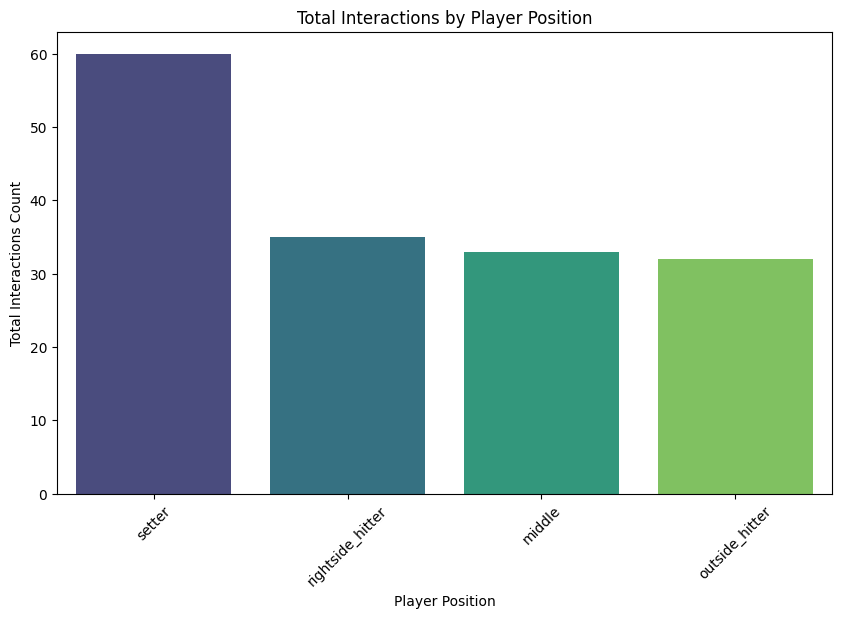

In [34]:
def count_interactions(cell):
    if pd.isna(cell):
        return 0
    elif isinstance(cell, str):
        return len(cell.split(', ')) if cell != '' else 0
    else:
        return 0
interaction_counts = {}
for col in df.columns:
    if 'who_high-fived_who?' in col or 'who_talked_to_who?' in col:
        position = col.split('[')[-1].split(']')[0].lower()
        counts = df[col].apply(lambda x: count_interactions(x))
        total_count = counts.sum()
        interaction_counts[position] = interaction_counts.get(position, 0) + total_count
interaction_counts_series = pd.Series(interaction_counts).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=interaction_counts_series.index, y=interaction_counts_series.values, palette='viridis')
plt.title('Total Interactions by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Total Interactions Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
positions = ['setter', 'outside_hitter', 'rightside_hitter', 'middle']


interaction_matrix = pd.DataFrame(np.zeros((len(positions), len(positions))), columns=positions, index=positions)

def process_interactions(cell, initiator):
    if cell:
        interacted_positions = cell.split(', ')
        for position in interacted_positions:
            position = position.lower().replace(' ', '_')  
            if position in positions:
                interaction_matrix.loc[initiator, position] += 1

for col in df.columns:
    if 'who_high-fived_who?' in col or 'who_talked_to_who?' in col:
        initiator_position = col.split('[')[-1].split(']')[0].lower()
        df[col].apply(lambda cell: process_interactions(cell, initiator_position))

plt.figure(figsize=(10, 6))
interaction_matrix.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Who High-fived Who?')
plt.xlabel('Initiator Position')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=0)
plt.legend(title='Interacted With')
plt.show()

AttributeError: 'float' object has no attribute 'split'

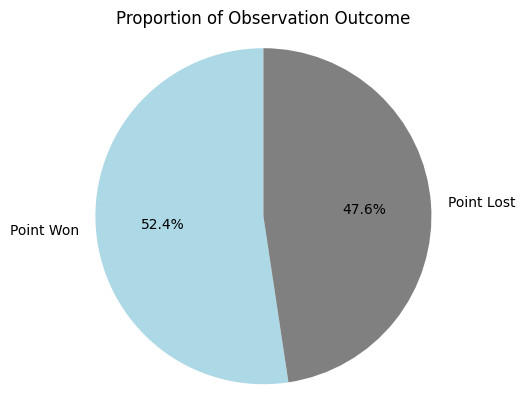

In [57]:
sex_counts = df['pre-condition_'].value_counts()
sex_proportions = sex_counts / sex_counts.sum()

fig, ax = plt.subplots()
ax.pie(sex_proportions, labels=sex_proportions.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','gray'])
ax.axis('equal') 
plt.title('Proportion of Observation Outcome')
plt.show()

In [49]:
df.columns

Index(['team_name/number', 'pre-condition_', 'score_after_point',
       'how_was_the_point_determined_(responsibility)?',
       'which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?',
       'how_was_the_point_won/lost?', 'quality_of_point',
       'type_of_interaction', 'quality_of_high-fives_/_physical_interaction',
       'quality_of_verbal_interaction', 'who_high-fived_who?_[setter]',
       'who_high-fived_who?_[outside_hitter]',
       'who_high-fived_who?_[rightside_hitter]',
       'who_high-fived_who?_[middle]', 'who_talked_to_who?_[setter]',
       'who_talked_to_who?_[outside_hitter]',
       'who_talked_to_who?_[rightside_hitter]', 'who_talked_to_who?_[middle]',
       'length_of_play', 'team_sex', 'high_five_count',
       'verbal_encouragement_count'],
      dtype='object')

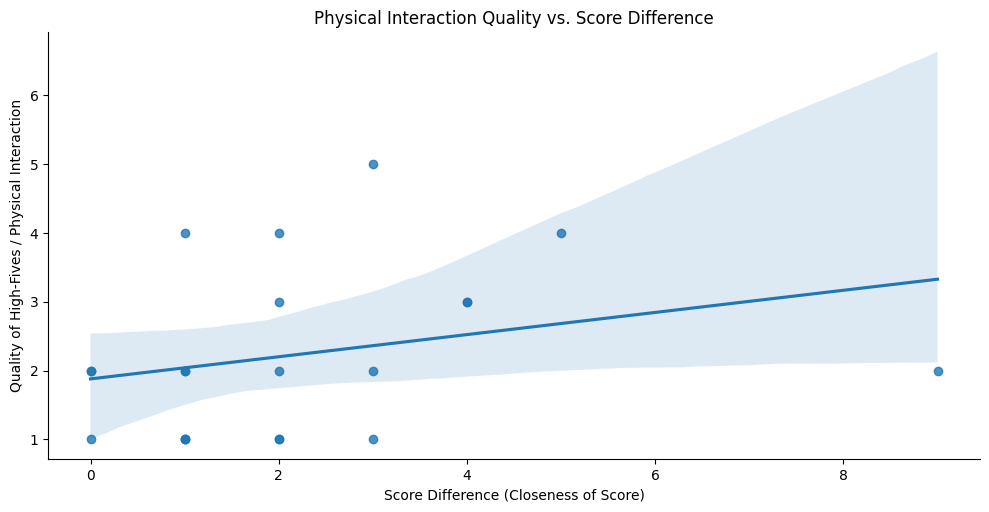

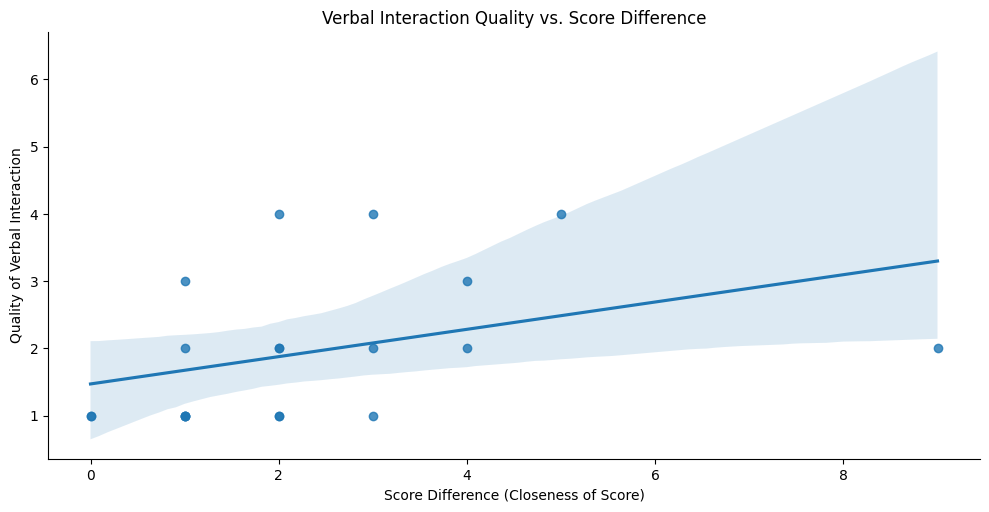

In [60]:
df['score_difference'] = df['score_after_point'].apply(lambda x: abs(int(x.split('-')[0]) - int(x.split('-')[1])))

df['quality_of_high-fives_/_physical_interaction'] = pd.to_numeric(df['quality_of_high-fives_/_physical_interaction'], errors='coerce')
df['quality_of_verbal_interaction'] = pd.to_numeric(df['quality_of_verbal_interaction'], errors='coerce')

sns.lmplot(x='score_difference', y='quality_of_high-fives_/_physical_interaction', data=df, aspect=2)
plt.title('Physical Interaction Quality vs. Score Difference')
plt.xlabel('Score Difference (Closeness of Score)')
plt.ylabel('Quality of High-Fives / Physical Interaction')

sns.lmplot(x='score_difference', y='quality_of_verbal_interaction', data=df, aspect=2, palette='viridis')
plt.title('Verbal Interaction Quality vs. Score Difference')
plt.xlabel('Score Difference (Closeness of Score)')
plt.ylabel('Quality of Verbal Interaction')

plt.show()